### Student Information_First part
Name: 莊安琦

Student ID: 108064532

GitHub ID: anchichuang

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [1]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


# use different method to query data
X[['category','category_name']][0:10]

,category,category_name
0,1,comp.graphics
1,1,comp.graphics
2,3,soc.religion.christian
3,3,soc.religion.christian
4,3,soc.religion.christian
5,3,soc.religion.christian
6,3,soc.religion.christian
7,2,sci.med
8,2,sci.med
9,2,sci.med


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [2]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64
sci.med                   264
comp.graphics             263
soc.religion.christian    261
alt.atheism               212
Name: category_name, dtype: int64
                        X_count  X_sample_count
soc.religion.christian      599             261
sci.med                     594             264
comp.graphics               584             263
alt.atheism                 480             212


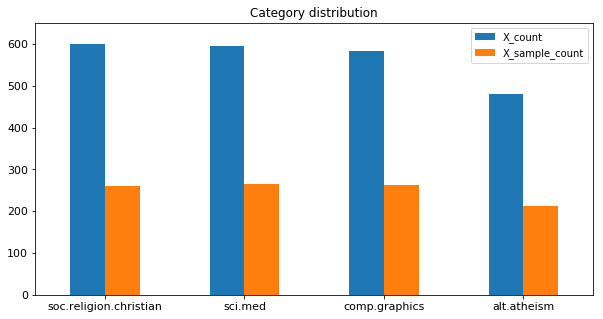

In [3]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline

X_sample = X.sample(n=1000) #random state
print(X.category_name.value_counts())
X_count = X.category_name.value_counts()
print(X_sample.category_name.value_counts())
X_sample_count = X_sample.category_name.value_counts()
index = ['soc.religion.christian','sci.med','comp.graphics','alt.atheism']

df = pd.DataFrame({'X_count': X_count,'X_sample_count': X_sample_count}, index = index)
print(df)
ax = df.plot.bar(title = 'Category distribution',
                 ylim = [0, 650],
                 rot = 0,
                 fontsize = 11,
                 figsize = (10,5))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [5]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_counts[4:5,0:38].toarray()
print(X_counts[4:5,0:38])
count_vect.get_feature_names()[37]

  (0, 37)	1
  (0, 0)	1


'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

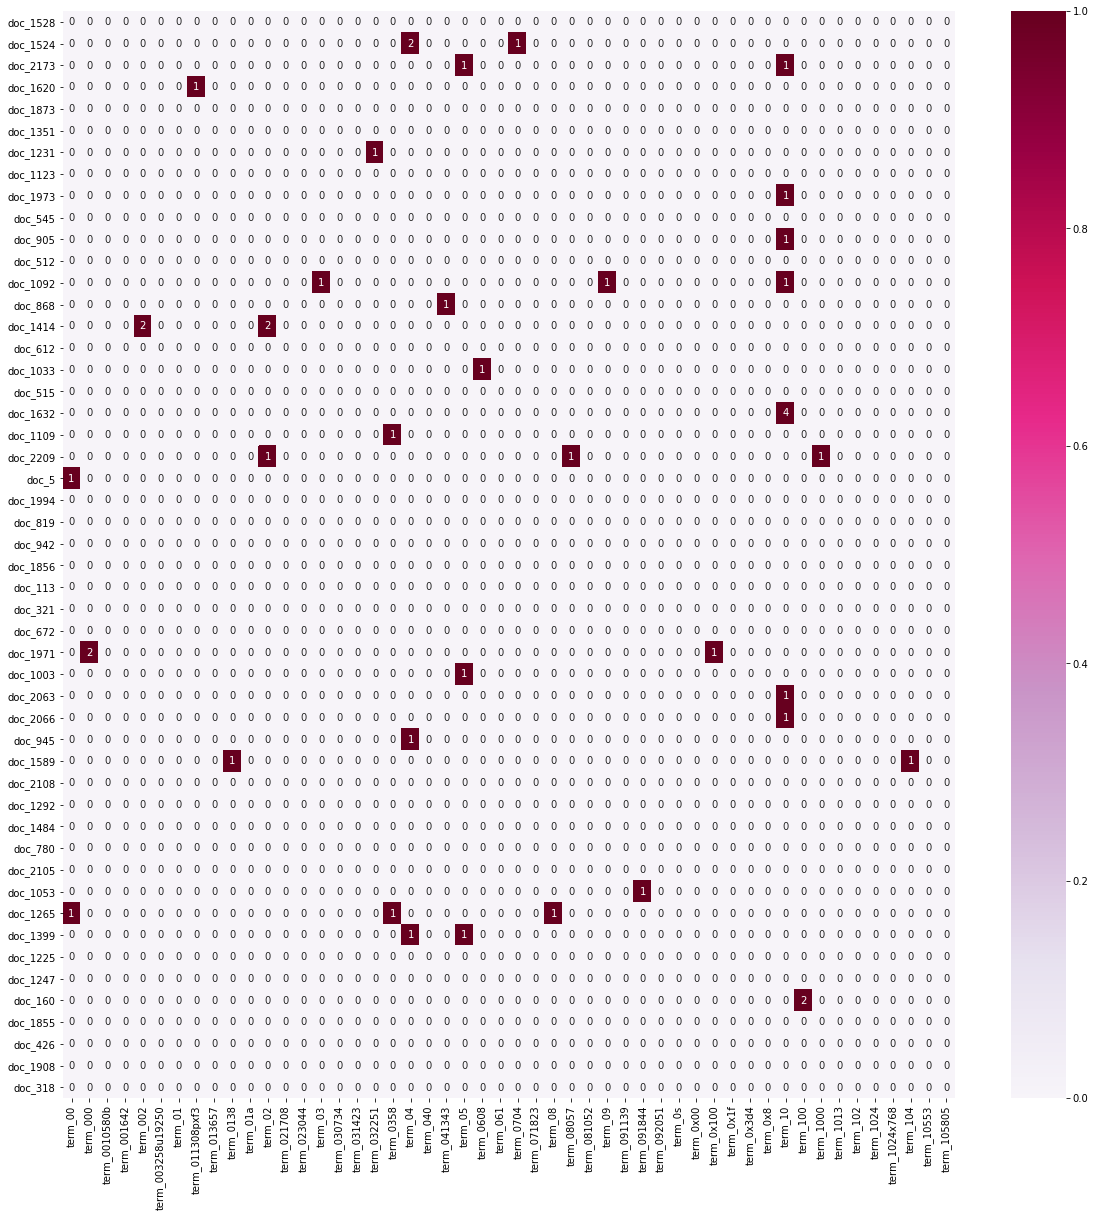

In [7]:
# Answer here
import seaborn as sns
plot_sample = X.sample(n=200)
count_vect_sample = CountVectorizer()
X_counts_sample = count_vect_sample.fit_transform(plot_sample.text)
# I use 50 terms to visualize
plot_x_sample = ["term_"+str(i) for i in count_vect_sample.get_feature_names()[0:50]]
plot_y_sample = ["doc_"+ str(i) for i in list(plot_sample.index)[0:50]]
plot_z_sample = X_counts_sample[0:50, 0:50].toarray()
df_todraw_sample = pd.DataFrame(plot_z_sample, columns = plot_x_sample, index = plot_y_sample)
plt.subplots(figsize=(20, 20))
ax_sample = sns.heatmap(df_todraw_sample,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

𝐻𝑖𝑛𝑡 : you can refer to Axes3D in the documentation.

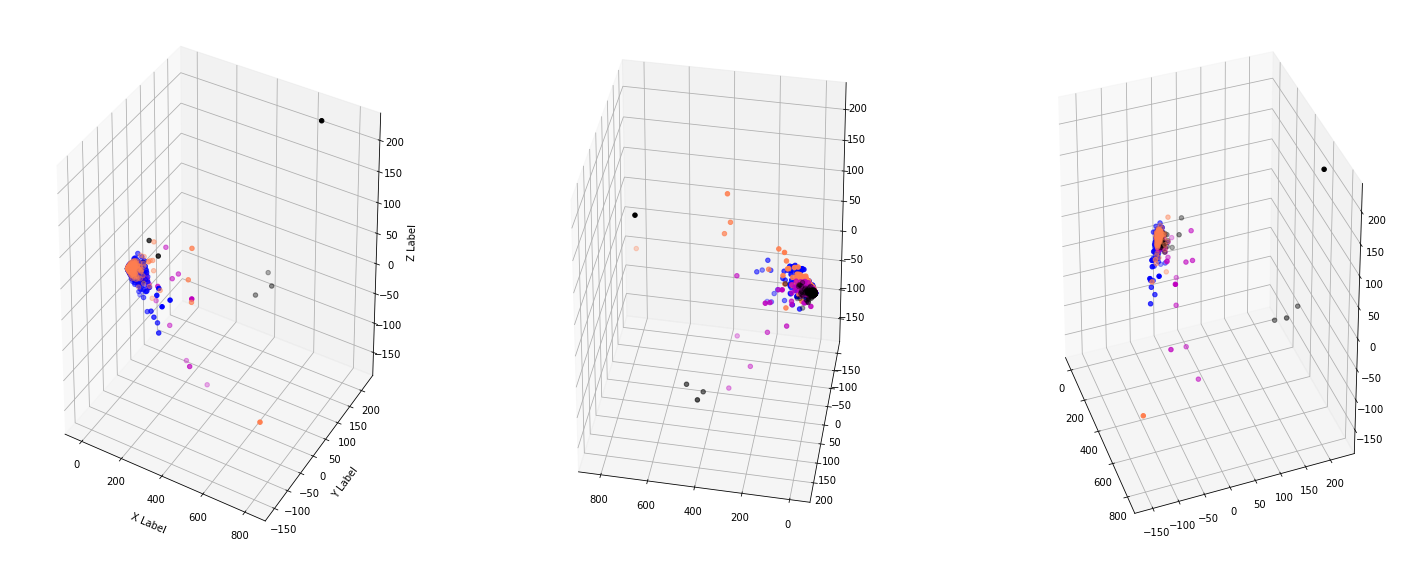

In [11]:
# answer here

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
col = ['coral', 'blue', 'black', 'm']
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
#X_reduced.shape

fig = plt.figure(figsize = (25,10))
ax1h = fig.add_subplot(131, projection='3d')
ax2h = fig.add_subplot(1, 3, 2, projection='3d')
ax3h = fig.add_subplot(1, 3, 3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax1h.scatter(xs, ys, zs, c=c, marker='o')
    ax2h.scatter(xs, ys, zs, c=c, marker='o')
    ax3h.scatter(xs, ys, zs, c=c, marker='o')

ax1h.set_xlabel('\nX Label')
ax1h.set_ylabel('\nY Label')
ax1h.set_zlabel('\nZ Label')


ax2h.view_init(30, 100)
ax3h.view_init(30, 340)


plt.show()

### >>> Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [8]:
# answer here
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import plotly
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
# Plotly Offline allows you to create graphs offline and save them locally. 
term_frequencies=np.asarray(X_counts.sum(axis=0))[0]

plotly.offline.init_notebook_mode(connected=True)

figure = go.Figure(layout_title_text="Frequency of the term",data=[go.Bar(y=term_frequencies)])
'''
figure.update_layout(
    title=go.layout.Title(
        text="Frequency of Term",
        x=0
    )
)
'''
#The tickvals and ticktext axis properties can be used 
#together to display custom tick label text at custom locations along an axis.
figure.update_xaxes(range=[0, 100],
                 showgrid=False,
                 ticktext=["term_"+str(i) for i in count_vect_sample.get_feature_names()[0:100]],
                 tickvals=np.arange(0,len(term_frequencies),1),
                 tickfont=dict(family='Rockwell', color='crimson', size=14))  
figure.update_yaxes(range=[0,200])
#no need to add(UserWarning: matplotlib is currently using a non-GUI backend)
#fig.show()


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [9]:
# answer here
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import plotly
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
# Plotly Offline allows you to create graphs offline and save them locally. 
term_frequencies=np.asarray(X_counts.sum(axis=0))[0]

plotly.offline.init_notebook_mode(connected=True)

#reduce the number of terms to 50
figure = go.Figure(layout_title_text="Frequency of the term",data=[go.Bar(y=term_frequencies[:50])])
'''
figure.update_layout(
    title=go.layout.Title(
        text="Frequency of Term",
        x=0
    )
)
'''
#The tickvals and ticktext axis properties can be used 
#together to display custom tick label text at custom locations along an axis.
figure.update_xaxes(range=[0, 50],
                 showgrid=False,
                 ticktext=["term_"+str(i) for i in count_vect_sample.get_feature_names()[0:50]],
                 tickvals=np.arange(0,len(term_frequencies[:50]),1),
                 tickfont=dict(family='Rockwell', color='crimson', size=14))  
figure.update_yaxes(range=[0,200])
#no need to add(UserWarning: matplotlib is currently using a non-GUI backend)
#fig.show()


In [80]:
print(term_frequencies[:10])
print(X_tailcount["term_frequencies_log"][0:10])

[134  92   1   2   1   3   1   1   1   1]
32142    10.303102
23610     9.779057
32493     9.753943
4992      9.474011
18474     9.420844
17556     9.325988
32139     9.280146
18551     9.041567
35638     8.725345
14601     8.693161
Name: term_frequencies_log, dtype: float64


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [11]:
# Answer here
import math
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import plotly

plotly.offline.init_notebook_mode(connected=True)
'''
X_tailcount = pd.DataFrame.from_dict(count_vect.get_feature_names())
X_tailcount["term_frequencies_log"] = [math.log(i) for i in term_frequencies]
#X_tailcount["Feature"] = count_vect.get_feature_names()
print(X_tailcount)
#sort by frequency
X_tailcount = X_tail.sort_values("term_frequencies_log",ascending=False)
#print(X_tailcount[0:50])
'''
X_tailcount = pd.DataFrame(count_vect.get_feature_names(), columns=['Feature'])
X_tailcount["term_frequencies_log"] = [math.log(i) for i in term_frequencies]
X_tailcount.sort_values(by=['term_frequencies_log'], ascending=False, inplace=True)
X_tailcount[0:5]
#X_tailcount['Feature']
#print(X_tailcount.term_frequencies_log[0:10])

,Feature,term_frequencies_log
32142,the,10.303102
23610,of,9.779057
32493,to,9.753943
4992,and,9.474011
18474,is,9.420844


In [12]:
X_tailcount["term_frequencies_log"][:5]

32142    10.303102
23610     9.779057
32493     9.753943
4992      9.474011
18474     9.420844
Name: term_frequencies_log, dtype: float64

In [13]:
#traceLongTail = {"x": list(X_tailcount[0]),"y": list(X_tailcount.term_frequencies_log)}
figure = go.Figure(layout_title_text="Sort by frequency",data=[go.Bar(y=X_tailcount["term_frequencies_log"][:200])])

figure.update_xaxes(
                 showgrid=False,
                 ticktext=count_vect.get_feature_names(),#X_tailcount['Feature'],
                 tickvals=np.arange(0,len(X_tailcount.term_frequencies_log),1),
                 tickfont=dict(family='Rockwell', color='crimson', size=10))  
figure.update_yaxes(range=[0,20])



### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [14]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
lab_b = preprocessing.LabelBinarizer()
#print(lab_b.fit(X.category))
lab_b.fit(X.category_name)
X['bin_category'] = lab_b.transform(X['category_name']).tolist()
X[0:10]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


In [15]:
term_frequencies[:50]

array([134,  92,   1,   2,   1,   3,   1,   1,   1,   1,   2,   1,   1,
         3,   1,   1,   1,   2,   1,   3,   1,   2,   1,   1,   1,   2,
         1,   1,   1,   1,   1,   1,   1,   1,   5,   1,  13,  95,   4,
         1,   1,   1,   1,   1,   2,   1,   1,   1,   2,   1], dtype=int64)